# PROG8245 - Lab 4

Erica Holden, 5490685

# Data Tidying and Cleaning

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying - `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [3]:
df_pew = pd.read_csv('./data/pew-raw.csv')

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [4]:
print(df_pew.head())

            religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0           Agnostic      27        34       60       81        76      137
1            Atheist      12        27       37       52        35       70
2           Buddhist      27        21       30       34        33       58
3           Catholic     418       617      732      670       638     1116
4  Dont know/refused      15        14       15       11        10       35


***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

The categories are too wide and might cause problems later, thinner is better

In [ ]:
# id vars remains untouched
# var name is the summary of the rest of column names
# value name is the sum of the values in the melted columns
df_pew_clean = df_pew.melt(id_vars=['religion'], var_name='income_range', value_name='citizens_count')

# Clean up some of the column names using str.replace to take out extraneous characters
df_pew_clean['income_range'] = df_pew_clean['income_range'].str.replace('<', '0-')
df_pew_clean['income_range'] = df_pew_clean['income_range'].str.replace('$', '')
df_pew_clean['income_range'] = df_pew_clean['income_range'].str.replace('k', '')

# Clean up the income so that a min_income and max_income column can be created
df_pew_clean['min_income'] = df_pew_clean['income_range'].str.split('-').str[0].astype(int)
df_pew_clean['max_income'] = df_pew_clean['income_range'].str.split('-').str[1].astype(int)
print(df_pew_clean.head())

            religion income_range  citizens_count  min_income  max_income
0           Agnostic         0-10              27           0          10
1            Atheist         0-10              12           0          10
2           Buddhist         0-10              27           0          10
3           Catholic         0-10             418           0          10
4  Dont know/refused         0-10              15           0          10


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [5]:
df_billboard = pd.read_csv('./data/billboard.csv', encoding='unicode_escape')

2. Observe the first few rows of the dataset.

In [6]:
print(df_billboard.head())

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN  

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [7]:
df_billboard_clean = df_billboard.melt(id_vars=['year','artist.inverted','track','time','genre','date.entered','date.peaked'], var_name='weeks', value_name='week_ranking')
print(df_billboard_clean.head())

   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked      weeks  week_ranking  
0  Rock   2000-09-23  2000-11-18  x1st.week          78.0  
1  Rock   2000-02-12  2000-04-08  x1st.week          15.0  
2  Rock   1999-10-23  2000-01-29  x1st.week          71.0  
3  Rock   2000-08-12  2000-09-16  x1st.week          41.0  
4  Rock   2000-08-05  2000-10-14  x1st.week          57.0  


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [8]:
# Clean up the weeks column to remove unwanted characters
df_billboard_clean['weeks'] = df_billboard_clean['weeks'].str.replace('x','')
df_billboard_clean['weeks'] = df_billboard_clean['weeks'].str.replace('st.week','')
df_billboard_clean['weeks'] = df_billboard_clean['weeks'].str.replace('nd.week','')
df_billboard_clean['weeks'] = df_billboard_clean['weeks'].str.replace('rd.week','')
df_billboard_clean['weeks'] = df_billboard_clean['weeks'].str.replace('th.week','')


5. Now let's inspect the ***Week*** column in the dataframe.

In [9]:
print(df_billboard_clean['weeks'].describe())
print(df_billboard_clean.head())

count     24092
unique       76
top           1
freq        317
Name: weeks, dtype: object
   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked weeks  week_ranking  
0  Rock   2000-09-23  2000-11-18     1          78.0  
1  Rock   2000-02-12  2000-04-08     1          15.0  
2  Rock   1999-10-23  2000-01-29     1          71.0  
3  Rock   2000-08-12  2000-09-16     1          41.0  
4  Rock   2000-08-05  2000-10-14     1          57.0  


Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.

*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


In [10]:
# Ensure 'date.entered' is a datetime object
df_billboard_clean['date.entered'] = pd.to_datetime(df_billboard_clean['date.entered'])

# Convert 'weeks' to numeric (if not already)
df_billboard_clean['weeks'] = pd.to_numeric(df_billboard_clean['weeks'], errors='coerce')

# Calculate the date for each ranking
df_billboard_clean['ranking_date'] = df_billboard_clean['date.entered'] + pd.to_timedelta(df_billboard_clean['weeks'] - 1, unit='W')

***What is the problem with the calculation above?***

7. Let's only keep necessary columns

In [ ]:
# We're droppping the 'year' column as it is redundant with 'ranking_date'
df_billboard_clean = df_billboard_clean.drop(columns=['year'])

8. How to rename your columns?

In [ ]:
# Rename columns for clarity
df_billboard_clean = df_billboard_clean.rename(columns={
    'artist.inverted': 'artist',
    'date.entered': 'date_entered',
    'date.peaked': 'date_peaked',
})

Display the dataframe

In [13]:
print(df_billboard_clean)

                    artist                                  track  time genre  \
0          Destiny's Child               Independent Women Part I  3:38  Rock   
1                  Santana                           Maria, Maria  4:18  Rock   
2            Savage Garden                     I Knew I Loved You  4:07  Rock   
3                  Madonna                                  Music  3:45  Rock   
4      Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38  Rock   
...                    ...                                    ...   ...   ...   
24087     Ghostface Killah                       Cherchez LaGhost  3:04   R&B   
24088          Smith, Will                            Freakin' It  3:58   Rap   
24089        Zombie Nation                          Kernkraft 400  3:30  Rock   
24090       Eastsidaz, The                               Got Beef  3:58   Rap   
24091               Fragma                         Toca's Miracle  3:22   R&B   

      date_entered date_pea

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [14]:
# Drop rows where 'week_ranking' is NaN
df_billboard_clean = df_billboard_clean.dropna(subset=['week_ranking'])
print(df_billboard_clean)

                    artist                                  track  time  \
0          Destiny's Child               Independent Women Part I  3:38   
1                  Santana                           Maria, Maria  4:18   
2            Savage Garden                     I Knew I Loved You  4:07   
3                  Madonna                                  Music  3:45   
4      Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
...                    ...                                    ...   ...   
19663             Lonestar                                 Amazed  4:25   
19700                Creed                                 Higher  5:16   
19980             Lonestar                                 Amazed  4:25   
20017                Creed                                 Higher  5:16   
20334                Creed                                 Higher  5:16   

         genre date_entered date_peaked  weeks  week_ranking ranking_date  
0         Rock   2000-0

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [15]:
df_cars = pd.read_csv('./data/cars.csv', sep=';')

First Row seems to be the datatype, we need to remove it

In [16]:
df_cars = df_cars.iloc[1:]

Let's observe the columns with null values by using the `isnull().sum()` function.

In [17]:
print(df_cars.isnull().sum())

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [18]:
num_rows_with_null = np.sum(df_cars.isnull().any(axis=1))
percent_with_null = (num_rows_with_null / len(df_cars)) * 100

print(f"{percent_with_null:.2f}%")

1.23%


Around *1.23%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns, and what percentage of columns we would lose:

In [ ]:
num_columns_with_null = np.sum(df_cars.isnull().any(axis=0))
percent_columns_with_null = (num_columns_with_null / df_cars.shape[1]) * 100

print(f"Percentage of columns that would be lost if we dropped those with null values: {percent_columns_with_null:.2f}%")

44.44%


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

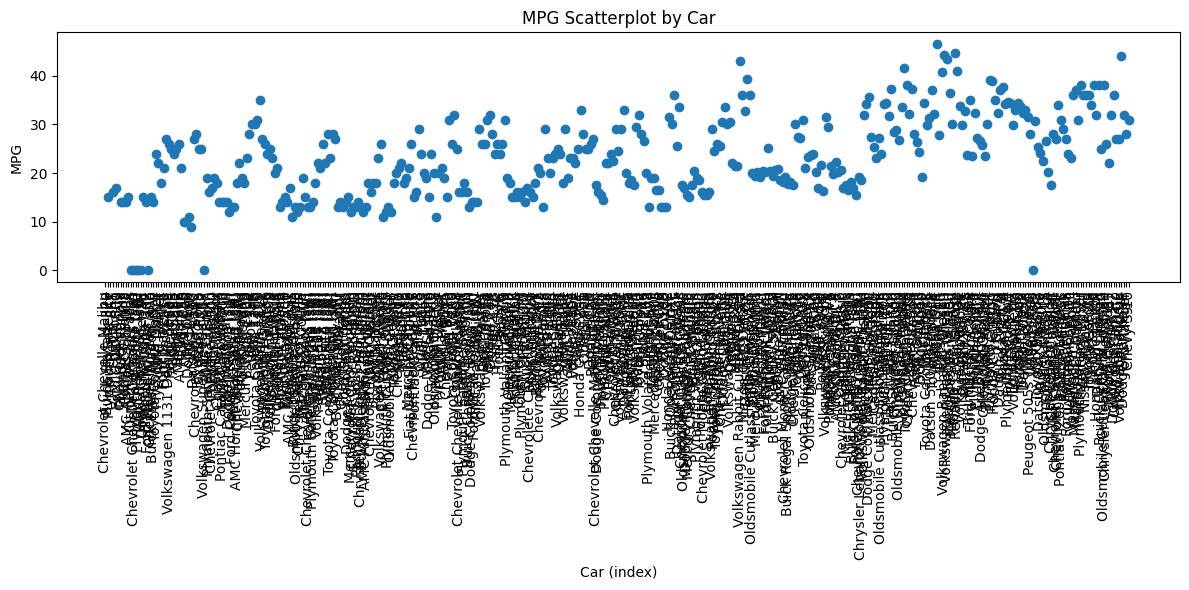

In [ ]:
# Design a scatterplot of the MPG feature by car
plt.figure(figsize=(12, 6))
df_cars['MPG'] = pd.to_numeric(df_cars['MPG'], errors='coerce')
plt.scatter(range(len(df_cars)), df_cars['MPG'])
plt.xlabel('Car (index)')
plt.ylabel('MPG')
plt.title('MPG Scatterplot by Car')
plt.xticks(ticks=range(len(df_cars)), labels=df_cars['Car'].astype(str), rotation=90)
plt.tight_layout()
plt.show()

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

In [21]:
print(df_cars.MPG.mean())

23.096277915632754


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [22]:
import sklearn.impute
imputer = sklearn.impute.SimpleImputer(strategy='mean')

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [23]:
mpg_values = df_cars[['MPG']].astype(float)  # Ensure column is float
imputer.fit(mpg_values)
mean_mpg = imputer.statistics_[0]

print(f"Mean MPG (using SimpleImputer): {mean_mpg}")

Mean MPG (using SimpleImputer): 23.096277915632754


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [24]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
column_name = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes.data)
df_diabetics.columns = column_name
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

<Axes: ylabel='bmi'>

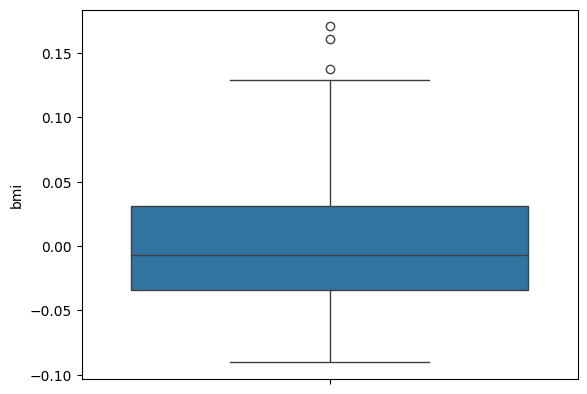

In [ ]:
import seaborn as sns
# Draw a boxplot of the BMI column
sns.boxplot(df_diabetics['bmi'])

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

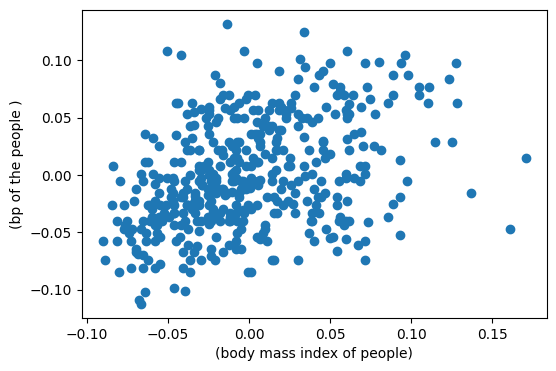

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [ ]:
#Calculate the z-score for the BMI column
z_score = np.abs((df_diabetics['bmi'] - df_diabetics['bmi'].mean()) / df_diabetics['bmi'].std())
print(f"Z-scores for BMI: {z_score}")

Z-scores for BMI: 0      1.295620
1      1.080955
2      0.933475
3      0.243495
4      0.764079
         ...   
437    0.412892
438    0.334032
439    0.334032
440    0.820305
441    1.533636
Name: bmi, Length: 442, dtype: float64


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [59]:
print(z_score[z_score > 2])

32     2.631029
114    2.314153
130    2.019910
138    2.336787
145    2.698932
251    2.065178
256    3.377953
262    2.676298
327    2.404689
332    2.200982
362    2.200982
366    2.880004
367    3.581660
403    2.042544
405    2.585761
Name: bmi, dtype: float64


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [ ]:
# Calculate the interquartile range (IQR) for the BMI column
iqr = df_diabetics['bmi'].quantile(0.75) - df_diabetics['bmi'].quantile(0.25)
print(f"IQR for BMI: {iqr}")

IQR for BMI: 0.06547708348825859


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [ ]:
# Calculate the upper and lower bounds for outliers using the IQR method
upper = df_diabetics['bmi'].quantile(0.75) + 1.5 * iqr
lower = df_diabetics['bmi'].quantile(0.25) - 1.5 * iqr
print(f"Upper bound for outliers: {upper}")
print(f"Lower bound for outliers: {lower}")

Upper bound for outliers: 0.1294636406639386
Lower bound for outliers: -0.13244469328909578


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [ ]:
# Remove outliers from the BMI column using the calculated bounds
df_diabetics_clean = df_diabetics[(df_diabetics['bmi'] < upper) & (df_diabetics['bmi'] > lower)]
print(f"Number of rows after removing outliers: {len(df_diabetics_clean)}")

Number of rows after removing outliers: 439
